### Pytorch Workflow


In [130]:
import torch 
from torch import nn  # nn contains all the pytorch neural network modules
import matplotlib.pyplot as plt 

torch.__version__

'2.1.2+cu118'

### Data Preparing and Loading

In [131]:
### Create  *known* Parameters
weight=0.7
bias=0.3

### Create *unknown* Parameters
start=0 
end=1
step=0.02
X=torch.arange(start,end,step).unsqueeze(dim=1) 
y=weight*X+bias

X[:10],y[:10],len(X),len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

#### Splitting data into training and test sets 

In [132]:
# Create train and test split 
train_split=int(0.8*len(X))
X_train,y_train=X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]
len(X_train),len(y_train),len(X_test),len(y_test)




(40, 40, 10, 10)

In [133]:
X_train,y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

### Visualization

In [134]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     preds=None):
   
   plt .figure(figsize=(10,7))
   plt.scatter(train_data,train_labels,c="b",s=4,label='Training Data')
   plt.scatter(test_data,test_labels,c="g",s=4,label='Testing Data')
   if preds is not None:
      plt.scatter(test_data,preds,c="r",s=4,label='Predictions')
      
   plt.legend(prop={"size":14});

    

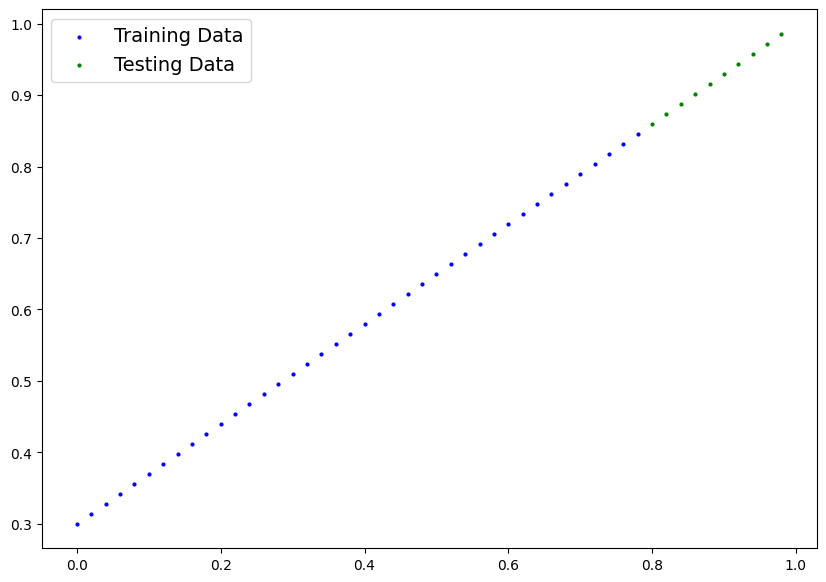

In [135]:
plot_predictions()


In [136]:
### Building Pytorch Model 
class LinearRegressionModel(nn.Module): # nn.Module is a base class for all neural network modules
     def __init__(self):
          super().__init__() # super() is used to call the __init__() of the parent class
          self.weights=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))# nn.Parameter is a wrapper for the tensor, which tells the optimizer that this tensor should be trained
          self.bias=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
          # Forward method to define the computation in the model
     def forward(self,x:torch.Tensor)->torch.tensor:
          return self.weights*x+self.bias # this is the linear regression formula
          



In [137]:
from sklearn.metrics import mean_squared_error

### Checking the contents of the Pytorch Model


In [138]:
model_0 = LinearRegressionModel()
list(model_0.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [139]:
torch.manual_seed(42)
torch.randn(1,requires_grad=True,dtype=torch.float)

tensor([0.3367], requires_grad=True)

In [140]:
model_0.state_dict() 

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [141]:
weight,bias

(0.7, 0.3)

In [142]:
### Making Predictions using torch inference model

In [143]:
## Make prediction with initial model
with torch.inference_mode():
    pred=model_0(X_test)
    
pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

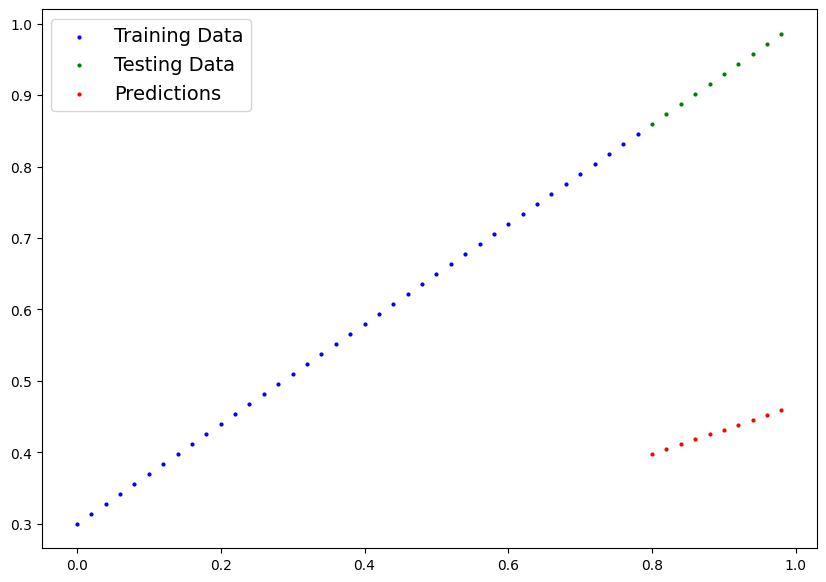

In [144]:
plot_predictions(preds=pred)

### 3.Training the Model

In [145]:
list(model_0.named_parameters())

[('weights',
  Parameter containing:
  tensor([0.3367], requires_grad=True)),
 ('bias',
  Parameter containing:
  tensor([0.1288], requires_grad=True))]

In [146]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [147]:
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), # parameters of target model to optimize
                            lr=0.01) # learning rate (how much the optimizer should change parameters at each step, hi

## Building a training loop in pytorch


In [148]:
epochs=20000
epoch_count=[]
loss_values=[]
test_loss_values=[]
# 0. Loop through the data
for epoch in range(epochs):
    model_0.train()
    # 1.Forward Pass
    y_pred=model_0(X_train)
    # 2.Calaculate the Loss
    loss=loss_fn(y_pred,y_train)
    
    # 3.Optimizer zero grad
    optimizer.zero_grad()
    # 4.Backward Pass
    loss.backward()
    optimizer.step()
    model_0.eval()
    with torch.inference_mode():
        preds=model_0(X_test)
        test_loss=loss_fn(preds,y_test)
        print(test_loss)
        if epoch%100==0:
            epoch_count.append(epoch)
            loss_values.append(loss)
            test_loss_values.append(test_loss)
            print(f"Epoch {epoch} training loss: {loss} test loss: {test_loss}")
            
        
     



tensor(0.4811)
Epoch 0 training loss: 0.31288138031959534 test loss: 0.48106518387794495
tensor(0.4676)
tensor(0.4541)
tensor(0.4407)
tensor(0.4272)
tensor(0.4137)
tensor(0.4002)
tensor(0.3868)
tensor(0.3733)
tensor(0.3598)
tensor(0.3464)
tensor(0.3329)
tensor(0.3194)
tensor(0.3059)
tensor(0.2925)
tensor(0.2790)
tensor(0.2655)
tensor(0.2521)
tensor(0.2396)
tensor(0.2282)
tensor(0.2173)
tensor(0.2070)
tensor(0.1977)
tensor(0.1891)
tensor(0.1810)
tensor(0.1735)
tensor(0.1667)
tensor(0.1604)
tensor(0.1547)
tensor(0.1497)
tensor(0.1446)
tensor(0.1402)
tensor(0.1365)
tensor(0.1327)
tensor(0.1290)
tensor(0.1258)
tensor(0.1227)
tensor(0.1203)
tensor(0.1178)
tensor(0.1154)
tensor(0.1136)
tensor(0.1118)
tensor(0.1100)
tensor(0.1083)
tensor(0.1065)
tensor(0.1047)
tensor(0.1036)
tensor(0.1025)
tensor(0.1014)
tensor(0.1003)
tensor(0.0992)
tensor(0.0981)
tensor(0.0970)
tensor(0.0959)
tensor(0.0948)
tensor(0.0937)
tensor(0.0926)
tensor(0.0915)
tensor(0.0904)
tensor(0.0893)
tensor(0.0889)
tensor(0.08

tensor(0.0050)
tensor(0.0084)
tensor(0.0050)
tensor(0.0084)
tensor(0.0050)
tensor(0.0084)
tensor(0.0050)
tensor(0.0084)
tensor(0.0050)
tensor(0.0084)
tensor(0.0050)
tensor(0.0084)
tensor(0.0050)
tensor(0.0084)
tensor(0.0050)
tensor(0.0084)
tensor(0.0050)
tensor(0.0084)
tensor(0.0050)
tensor(0.0084)
tensor(0.0050)
tensor(0.0084)
tensor(0.0050)
tensor(0.0084)
tensor(0.0050)
tensor(0.0084)
tensor(0.0050)
tensor(0.0084)
tensor(0.0050)
tensor(0.0084)
tensor(0.0050)
tensor(0.0084)
tensor(0.0050)
tensor(0.0084)
tensor(0.0050)
tensor(0.0084)
tensor(0.0050)
tensor(0.0084)
tensor(0.0050)
tensor(0.0084)
tensor(0.0050)
tensor(0.0084)
tensor(0.0050)
tensor(0.0084)
tensor(0.0050)
tensor(0.0084)
tensor(0.0050)
tensor(0.0084)
tensor(0.0050)
tensor(0.0084)
tensor(0.0050)
tensor(0.0084)
tensor(0.0050)
tensor(0.0084)
tensor(0.0050)
tensor(0.0084)
tensor(0.0050)
tensor(0.0084)
tensor(0.0050)
tensor(0.0084)
tensor(0.0050)
tensor(0.0084)
tensor(0.0050)
tensor(0.0084)
tensor(0.0050)
tensor(0.0084)
tensor(0.0

In [149]:
print(model_0.state_dict())

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])


In [150]:
import numpy as np

In [151]:
import numpy as np

loss_values_np = np.array(torch.tensor(loss_values).cpu().detach().numpy())
test_loss_values_np = np.array(torch.tensor(test_loss_values).cpu().detach().numpy())
epoch_count_np = np.array(epoch_count)


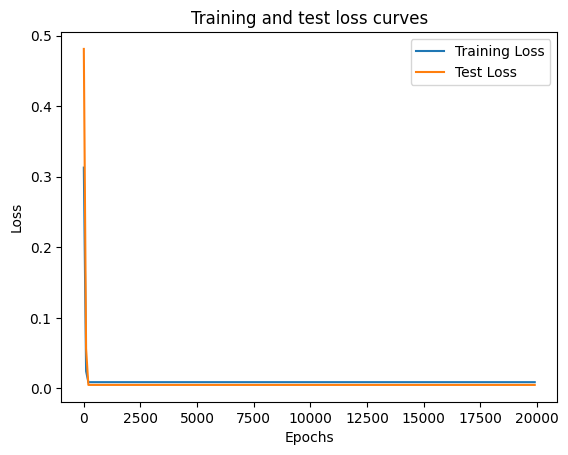

In [152]:
plt.plot(epoch_count_np,loss_values_np,label="Training Loss")
plt.plot(epoch_count_np,test_loss_values_np,label="Test Loss")
plt.title("Training and test loss curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [153]:
with torch.inference_mode():
    y_preds=model_0(X_test)

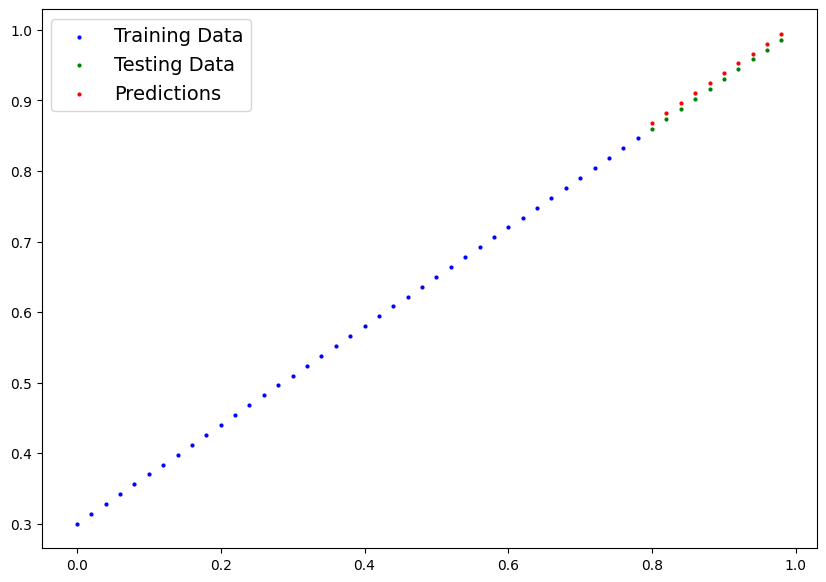

In [154]:
plot_predictions(preds=y_preds)

In [155]:
weight,bias

(0.7, 0.3)

### Saving a Pytorch Model




In [156]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [157]:
print(model_0.parameters())

<generator object Module.parameters at 0x000001FAA5A566C0>


In [158]:
## Saving our Pytorch Model
from pathlib import Path
MODEL_PATH=Path("Pytorch_Linear_Regression_Model.pt")
torch.save(model_0,MODEL_PATH)


In [159]:
## Loading our Pytorch Model
loaded_model=torch.load(MODEL_PATH)
loaded_model.state_dict()


OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

### Putting it all togother

In [160]:
import torch
from torch import nn 
import matplotlib.pyplot as plt
from pathlib import Path

In [161]:
torch.__version__

'2.1.2+cu118'

In [162]:
## Setup device agnostic code
device="cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


## Data

### Create some data using the linear regression formula of y=WX+b+e

In [163]:
weight=0.7
bias=0.3

#Create range values
start=0
end=1
step=0.02

# Create X and y(features and lables)
X=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*X+bias

In [164]:
print(X)

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800],
        [0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])


In [165]:
print(y)

tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260],
        [0.4400],
        [0.4540],
        [0.4680],
        [0.4820],
        [0.4960],
        [0.5100],
        [0.5240],
        [0.5380],
        [0.5520],
        [0.5660],
        [0.5800],
        [0.5940],
        [0.6080],
        [0.6220],
        [0.6360],
        [0.6500],
        [0.6640],
        [0.6780],
        [0.6920],
        [0.7060],
        [0.7200],
        [0.7340],
        [0.7480],
        [0.7620],
        [0.7760],
        [0.7900],
        [0.8040],
        [0.8180],
        [0.8320],
        [0.8460],
        [0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])


In [166]:
# Split data
train_split=int(0.8*len(X))
X_train,y_train=X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]


In [167]:
# Plotting the data

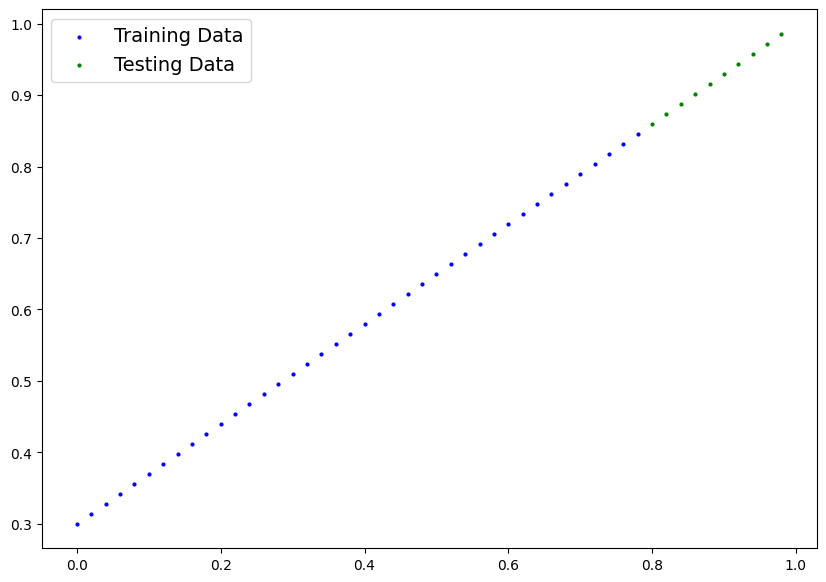

In [168]:
plot_predictions(X_train,y_train,X_test,y_test)

### Building a PytorchTensor Linear Model

In [169]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for createing the model Paramters
        self.linear_layer=nn.Linear(in_features=1,out_features=1)

    def forward(self,x:torch.Tensor)->torch.Tensor:
        return self.linear_layer(x)
torch.manual_seed(42)
model_1=LinearRegressionModelV2()
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [170]:
# Set the model to use the target device
device

'cuda'

In [171]:
next(model_1.parameters()).device

device(type='cpu')

In [172]:
model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [173]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.8300], device='cuda:0'))])

In [175]:
loss_fn=nn.L1Loss()

optimizer=torch.optim.SGD(params=model_1.parameters(),lr=0.01,)


In [176]:
# training Loss
torch.manual_seed(42)
# put data on the target device
X_train=X_train.to(device)
y_train=y_train.to(device)
X_test=X_test.to(device)
y_test=y_test.to(device)



epochs=20000
for epoch in range(epochs):
    model_1.train()
    y_pred=model_1(X_train)
    loss=loss_fn(y_pred,y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    ### Testing 
    model_1.eval()
    with torch.inference_mode():
        test_pred=model_1(X_test)
        test_loss=loss_fn(test_pred,y_test)

    if epoch%10==0:
        print(f"Epoch {epoch}| Loss:{loss} | Test loss:{test_loss}")
       


Epoch 0| Loss:0.5551779866218567 | Test loss:0.5739762187004089
Epoch 10| Loss:0.439968079328537 | Test loss:0.4392664134502411
Epoch 20| Loss:0.3247582018375397 | Test loss:0.30455657839775085
Epoch 30| Loss:0.20954833924770355 | Test loss:0.16984669864177704
Epoch 40| Loss:0.09433845430612564 | Test loss:0.03513690456748009
Epoch 50| Loss:0.023886388167738914 | Test loss:0.04784907028079033
Epoch 60| Loss:0.019956795498728752 | Test loss:0.045803118497133255
Epoch 70| Loss:0.016517987474799156 | Test loss:0.037530567497015
Epoch 80| Loss:0.013089174404740334 | Test loss:0.02994490973651409
Epoch 90| Loss:0.009653178043663502 | Test loss:0.02167237363755703
Epoch 100| Loss:0.006215683650225401 | Test loss:0.014086711220443249
Epoch 110| Loss:0.00278724217787385 | Test loss:0.005814164876937866
Epoch 120| Loss:0.0012645035749301314 | Test loss:0.013801801018416882
Epoch 130| Loss:0.0012645035749301314 | Test loss:0.013801801018416882
Epoch 140| Loss:0.0012645035749301314 | Test loss:0.

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.8300], device='cuda:0'))])

In [ ]:
# Turn model into evaluation mode
model_1.eval()

with torch.inference_mode():
    y_preds=model_1(X_test)
y_preds

tensor([[1.4416],
        [1.4569],
        [1.4722],
        [1.4875],
        [1.5028],
        [1.5181],
        [1.5334],
        [1.5487],
        [1.5640],
        [1.5793]], device='cuda:0')

In [177]:
from pathlib import Path
MODEL_NAME="01_pytorch_workflow_model_1.pth"
MODEL_PATH=Path(MODEL_NAME)
torch.save(model_1,MODEL_PATH)


In [178]:
# Load a Pytorch Model
loaded_model=torch.load(MODEL_PATH)
loaded_model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [ ]:
next(loaded_model.state_dict())